<a href="https://colab.research.google.com/github/seoinhyeok96/Everything-a-Data-Analyst-Needs-to-Know/blob/main/%ED%98%B8%ED%85%94_%EC%98%88%EC%95%BD_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(color_codes=True)
%matplotlib inline


In [ ]:
# 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/Colab Notebooks/code/데이터분석의 모든것 예제/datasets/hotel_bookings.csv

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/code/데이터분석의 모든것 예제/datasets/hotel_bookings.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# 각 칼럼 속성및 결측지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# 통계치 확인
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# 각 컬럼의 왜도 확인
df.skew()

<ipython-input-8-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


is_canceled                        0.536678
lead_time                          1.346550
arrival_date_year                 -0.232583
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
adults                            18.317805
children                           4.112590
babies                            24.646545
is_repeated_guest                  5.326315
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.089386
company                            0.601600
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
dtype: float64

In [ ]:
# 각 컬럼의 첨도 확인
df.kurtosis()

<ipython-input-9-2f8221835121>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


is_canceled                         -1.712005
lead_time                            1.696449
arrival_date_year                   -0.994564
arrival_date_week_number            -0.986077
arrival_date_day_of_month           -1.187168
stays_in_weekend_nights              7.174066
stays_in_week_nights                24.284555
adults                            1352.115116
children                            18.673692
babies                            1633.948235
is_repeated_guest                   26.370077
previous_cancellations             674.073693
previous_bookings_not_canceled     767.245210
booking_changes                     79.393605
agent                               -0.007180
company                             -0.490795
days_in_waiting_list               186.793070
adr                               1013.189851
required_car_parking_spaces         29.998056
total_of_special_requests            1.492565
dtype: float64

<Axes: >

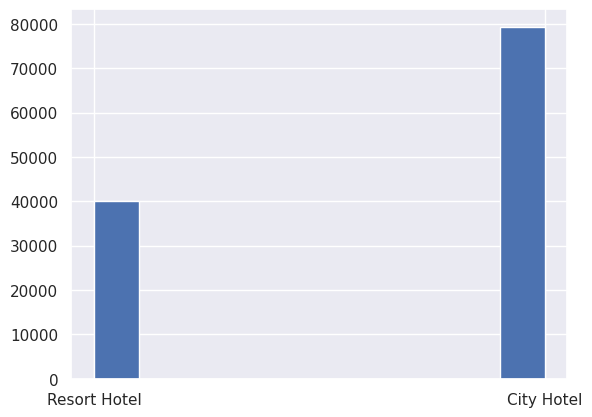

In [ ]:
# 호텔 종류 2개 확인
df['hotel'].hist()

<Axes: >

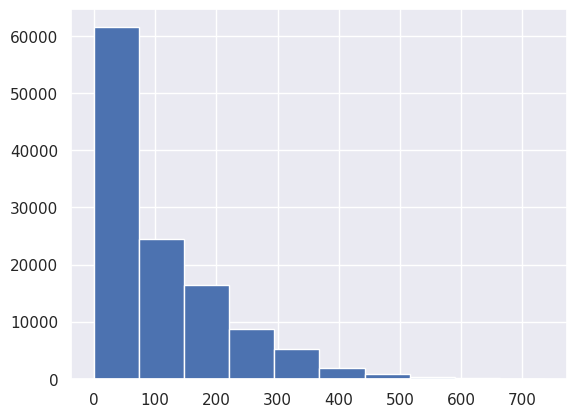

In [ ]:
df['lead_time'].hist()

<ipython-input-24-311e3747de49>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lead_time'])


<Axes: xlabel='lead_time', ylabel='Density'>

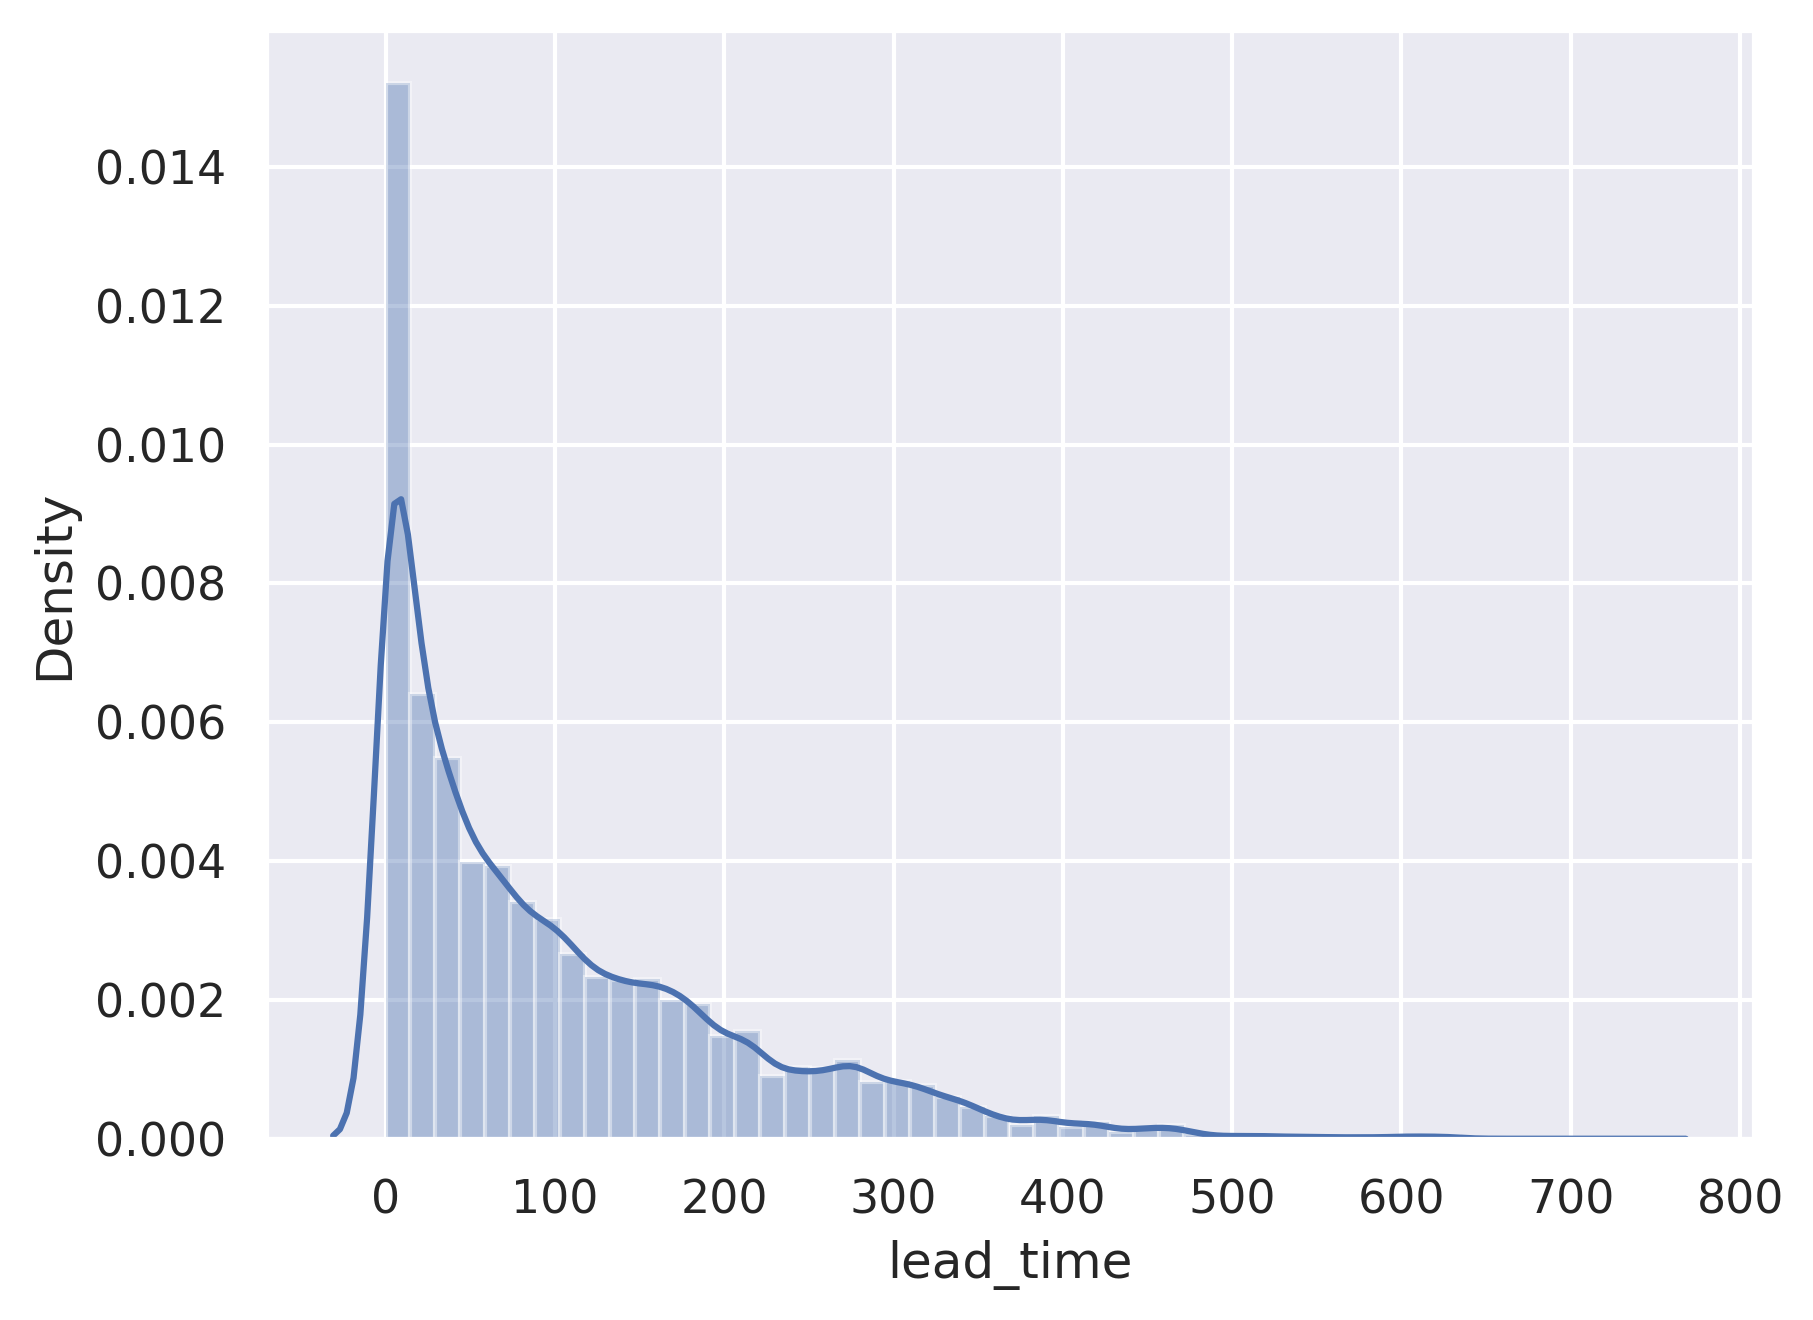

In [ ]:
# 특정 변수 분포 시각화

sns.distplot(df['lead_time'])

<Axes: xlabel='hotel', ylabel='lead_time'>

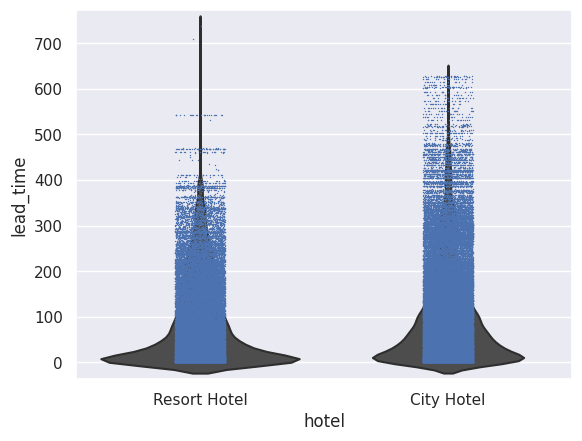

In [ ]:
# 호텔 구분에 따라 lead_time 분포 차이 시각화

sns.violinplot(x="hotel", y="lead_time", data=df, inner=None, color=".3")
sns.stripplot(x="hotel", y="lead_time", data=df, size=1)

In [ ]:
# 공분산 확인
df.cov()

<ipython-input-26-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,0.233210,15.126964,0.005692,0.053534,-0.025994,-0.000864,0.022822,0.016789,0.000972,-0.001529,-0.007197,0.044906,-0.041478,-0.045481,-4.490794,-1.033208,0.460407,1.160602,-0.023158,-0.089840
lead_time,15.126964,11419.721511,3.034866,184.455853,2.127750,9.142389,33.810687,7.398401,-1.602367,-0.217774,-2.336794,7.763414,-11.769232,0.010375,-831.818443,1662.193716,319.796767,-340.640932,-3.052469,-8.108810
arrival_date_year,0.005692,3.034866,0.500522,-5.203069,-0.001373,0.015188,0.041694,0.012145,0.015402,-0.000909,0.001286,-0.071575,0.030954,0.014247,4.964410,24.361820,-0.703261,7.064052,-0.002375,0.060874
arrival_date_week_number,0.053534,184.455853,-5.203069,185.099790,7.981327,0.247374,0.403932,0.204187,0.029924,0.013781,-0.072053,0.407810,-0.425865,0.048877,-45.917933,-157.348199,5.489676,52.109585,0.006409,0.282050
arrival_date_day_of_month,-0.025994,2.127750,-0.001373,7.981327,77.102966,-0.143405,-0.472085,-0.007965,0.050899,-0.000197,-0.009484,-0.200257,-0.003942,0.060788,1.448817,50.497157,3.511319,13.421189,0.018703,0.021317
stays_in_weekend_nights,-0.000864,9.142389,0.015188,0.247374,-0.143405,0.997229,0.950855,0.053144,0.018226,0.001798,-0.015313,-0.010771,-0.063875,0.041222,15.651660,7.052193,-0.951453,2.490075,-0.004545,0.057533
stays_in_week_nights,0.022822,33.810687,0.041694,0.403932,-0.472085,0.950855,3.641554,0.102775,0.033619,0.003754,-0.032617,-0.022545,-0.139284,0.119760,38.502691,40.709348,-0.067817,6.291289,-0.011636,0.103166
adults,0.016789,7.398401,0.012145,0.204187,-0.007965,0.053144,0.102775,0.335543,0.007029,0.001024,-0.014908,-0.003296,-0.093665,-0.019525,-1.936162,13.385137,-0.084423,6.751655,0.002101,0.056433
children,0.000972,-1.602367,0.015402,0.029924,0.050899,0.018226,0.033619,0.007029,0.158851,0.000933,-0.002302,-0.008322,-0.012577,0.012726,1.873407,0.642877,-0.233331,6.542931,0.005500,0.025830
babies,-0.001529,-0.217774,-0.000909,0.013781,-0.000197,0.001798,0.003754,0.001024,0.000933,0.009494,-0.000153,-0.000617,-0.000956,0.005303,0.388872,0.129959,-0.018207,0.143711,0.000893,0.007562


<ipython-input-31-83642193f710>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

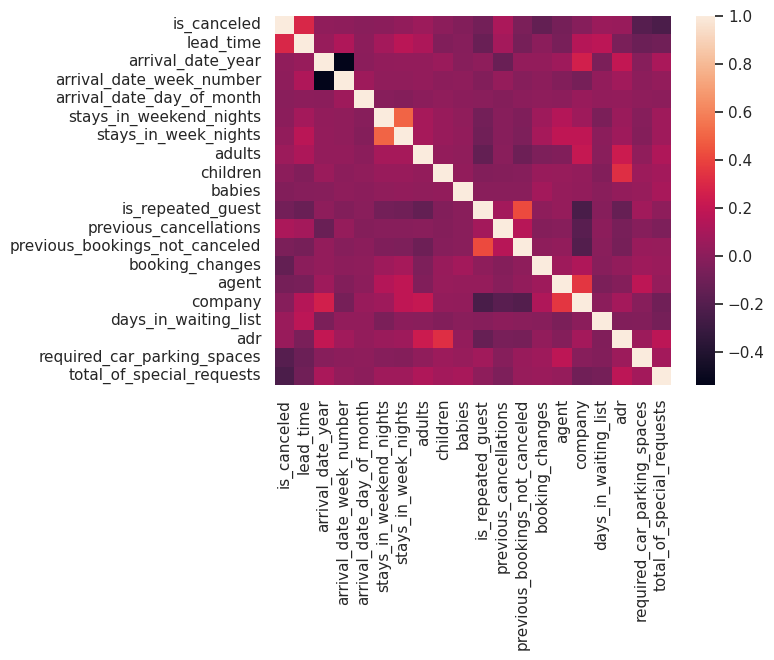

In [ ]:
plt.rcParams['figure.dpi'] = 100
sns.heatmap(df.corr())